<a href="https://colab.research.google.com/github/tavasoli-reza/Loan-Approval-Prediction-Machine-Learning-Project-/blob/master/Loan_Approval(Reza).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#***************************************************************************************************************
#***************************                 Loan approval Prediction                ***************************
#***************************                          Reza                           ***************************
#***************************************************************************************************************

In [0]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')

%matplotlib inline

In [0]:
os.chdir(r"C:\Users\reza\Desktop\python project\loan_eligibility\Loan-prediction-using-Machine-Learning-and-Python-master\Loan-prediction-using-Machine-Learning-and-Python-master\data")
os.getcwd()

'C:\\Users\\reza\\Desktop\\python project\\loan_eligibility\\Loan-prediction-using-Machine-Learning-and-Python-master\\Loan-prediction-using-Machine-Learning-and-Python-master\\data'

In [0]:
df = pd.read_csv("train_loan_home.csv") 

In [0]:
#***************************************************************************************************************
#***************************           Exploratory Data Analysis(EDA)                ***************************
#***************************************************************************************************************

In [0]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
#describing variables , summary statistic( count, mean,std deviation, min, max,percentiles)
round(df.describe())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.0,614.0,592.0,600.0,564.0
mean,5403.0,1621.0,146.0,342.0,1.0
std,6109.0,2926.0,86.0,65.0,0.0
min,150.0,0.0,9.0,12.0,0.0
25%,2878.0,0.0,100.0,360.0,1.0
50%,3812.0,1188.0,128.0,360.0,1.0
75%,5795.0,2297.0,168.0,360.0,1.0
max,81000.0,41667.0,700.0,480.0,1.0


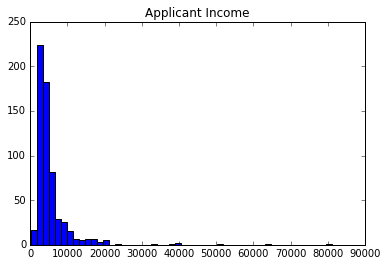

In [0]:
plt.title("Applicant Income")
df['ApplicantIncome'].hist(bins=50,color="b",edgecolor='black',grid=False) #skewed 

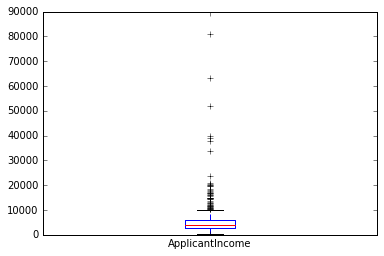

In [0]:
df.boxplot(column='ApplicantIncome',grid=False) #Outliers present

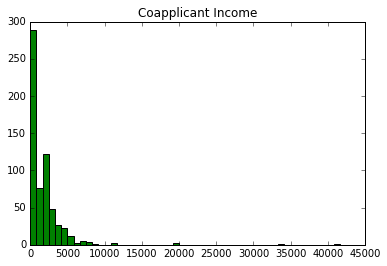

In [0]:
plt.title("Coapplicant Income")
df['CoapplicantIncome'].hist(bins=50,color="g",edgecolor='black',grid=False) #skewed 

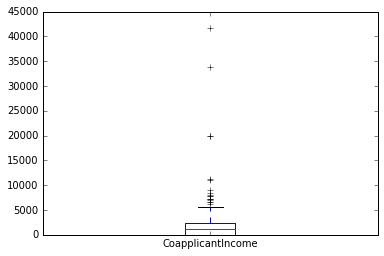

In [0]:
df.boxplot(column='CoapplicantIncome',grid=False) #Outliers present

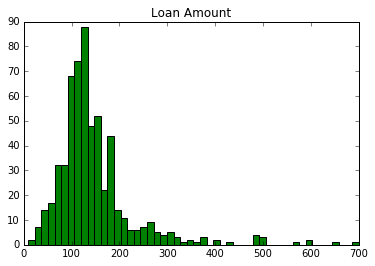

In [0]:
plt.title("Loan Amount")
df['LoanAmount'].hist(bins=50,color="g",edgecolor='black',grid=False) #slightly skewed 

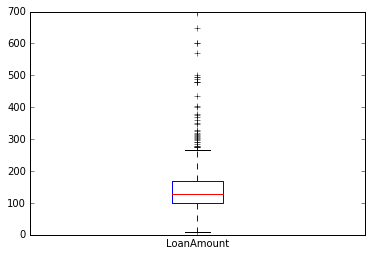

In [0]:
df.boxplot(column='LoanAmount',grid=False) #Outliers present

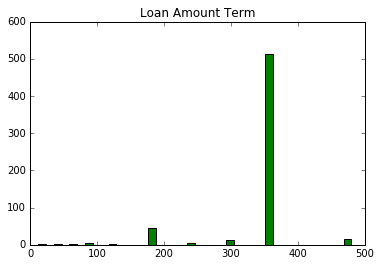

In [0]:
plt.title("Loan Amount Term")
df['Loan_Amount_Term'].hist(bins=40,color='g',edgecolor='black',grid=False) #most of the people take for 360 months loan

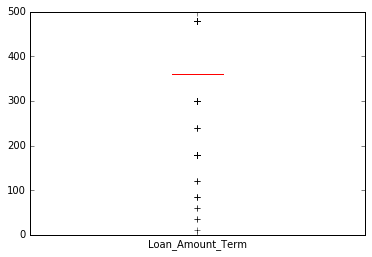

In [0]:
df.boxplot(column='Loan_Amount_Term',grid=False)

In [0]:
#Exploratory data analysis for Categorical variables

In [0]:
df['Gender'].value_counts() # Mostly Male, around (614-601) = 13 values missing

Male      489
Female    112
Name: Gender, dtype: int64

In [0]:
df['Married'].value_counts() # 3 missing values

Yes    398
No     213
Name: Married, dtype: int64

In [0]:
df['Dependents'].value_counts() 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
df['Education'].value_counts() # most of the people are graduates

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [0]:
df['Self_Employed'].value_counts() #Most of the people are not self employed, they are working

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
df['Property_Area'].value_counts() 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [0]:
df['Loan_Status'].value_counts() 

Y    422
N    192
Name: Loan_Status, dtype: int64

In [0]:
round(df[['Gender', 'ApplicantIncome']].groupby(['Gender'],as_index = False).mean().sort_values(by = 'Gender', ascending = False))

,Gender,ApplicantIncome
1,Male,5446.0
0,Female,4643.0


In [0]:
round(df[['Married', 'ApplicantIncome']].groupby(['Married'],as_index = False).mean().sort_values(by = 'Married', ascending = False))

,Married,ApplicantIncome
1,Yes,5629.0
0,No,4970.0


In [0]:
round(df[['Self_Employed', 'ApplicantIncome']].groupby(['Self_Employed'],
                                               as_index = False).mean().sort_values(by = 'Self_Employed', ascending = False))

,Self_Employed,ApplicantIncome
1,Yes,7381.0
0,No,5050.0


In [0]:
round(df[['Gender', 'Married', 'ApplicantIncome']].groupby(['Gender', 'Married'],
                                               as_index = False).mean().sort_values(by = 'Gender',ascending = False))

,Gender,Married,ApplicantIncome
2,Male,No,5236.0
3,Male,Yes,5530.0
0,Female,No,4504.0
1,Female,Yes,4830.0


In [0]:
temp1 = df['Credit_History'].value_counts(ascending=True)

In [0]:
print(temp1)

0.0     89
1.0    475
Name: Credit_History, dtype: int64


Text(0,0.5,'Probability of getting loan')

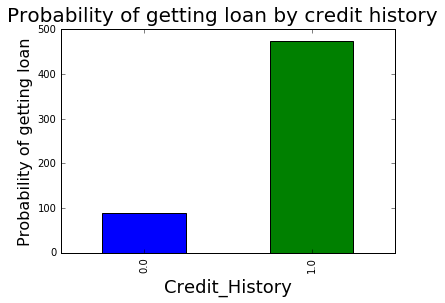

In [0]:
fig = plt.figure()
temp1.plot(kind='bar')
fig.suptitle('Probability of getting loan by credit history', fontsize=20)
plt.xlabel('Credit_History', fontsize=18)
plt.ylabel('Probability of getting loan', fontsize=16)

In [0]:
#***************************************************************************************************************
#***************************               Missing value handling                    ***************************
#***************************************************************************************************************

In [0]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [0]:
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


In [0]:
#impute loan amount column based on self emplyoed and education
#impute self empoloyed first
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
 #impute missing value with No (median)more than 500 no from 600 total
df['Self_Employed'].fillna('No',inplace=True)

In [0]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [0]:
# Replace missing values
df['LoanAmount'] = df.groupby(['Education','Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.median()))

In [0]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [0]:
#impute missing value with Yes (median)
df['Married'].fillna('Yes',inplace=True)

In [0]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
 #impute missing value with 0 (median)
df['Dependents'].fillna('0',inplace=True)

In [0]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [0]:
 #impute missing value with Male (median)
df['Gender'].fillna('Male',inplace=True)

In [0]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [0]:
#impute missing value with 1 (median)
df['Credit_History'].fillna(1.0,inplace=True)

In [0]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [0]:
 #impute missing value with 360 (median)
df['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [0]:
#more visualization

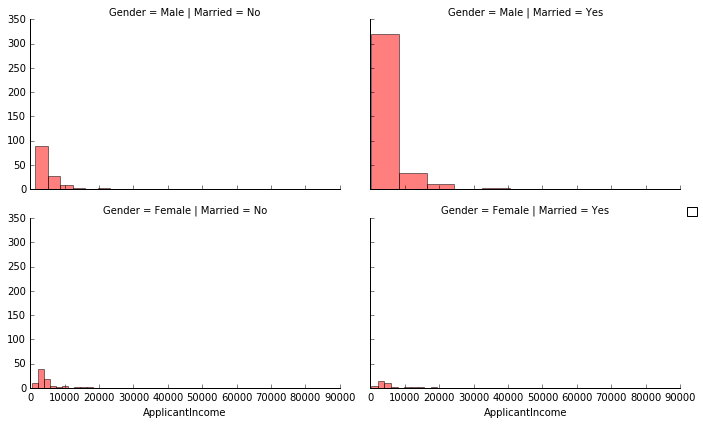

In [0]:
grid = sns.FacetGrid(df, row='Gender', col='Married', size=3, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10,color='red',edgecolor='black')
grid.add_legend()


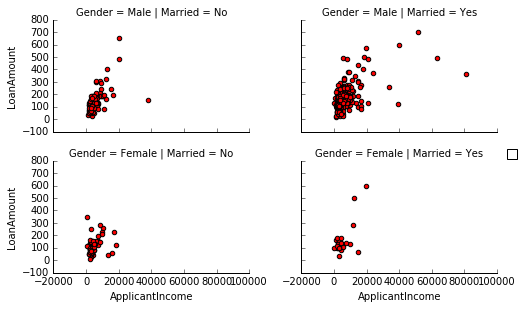

In [0]:
grid = sns.FacetGrid(df, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.scatter, 'ApplicantIncome','LoanAmount' ,color='r',edgecolor='black')
grid.add_legend()

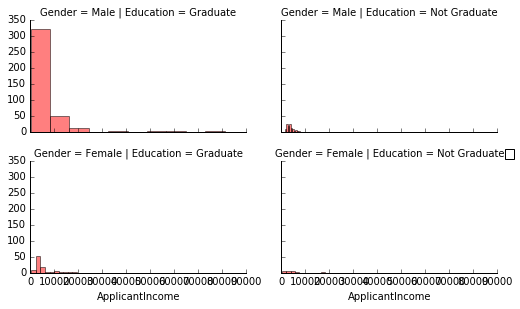

In [0]:
grid = sns.FacetGrid(df, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10,color='r',edgecolor='black')
grid.add_legend()

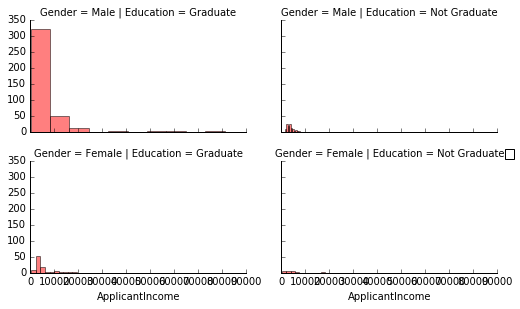

In [0]:
grid = sns.FacetGrid(df, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10,color='r',edgecolor='black')
grid.add_legend()

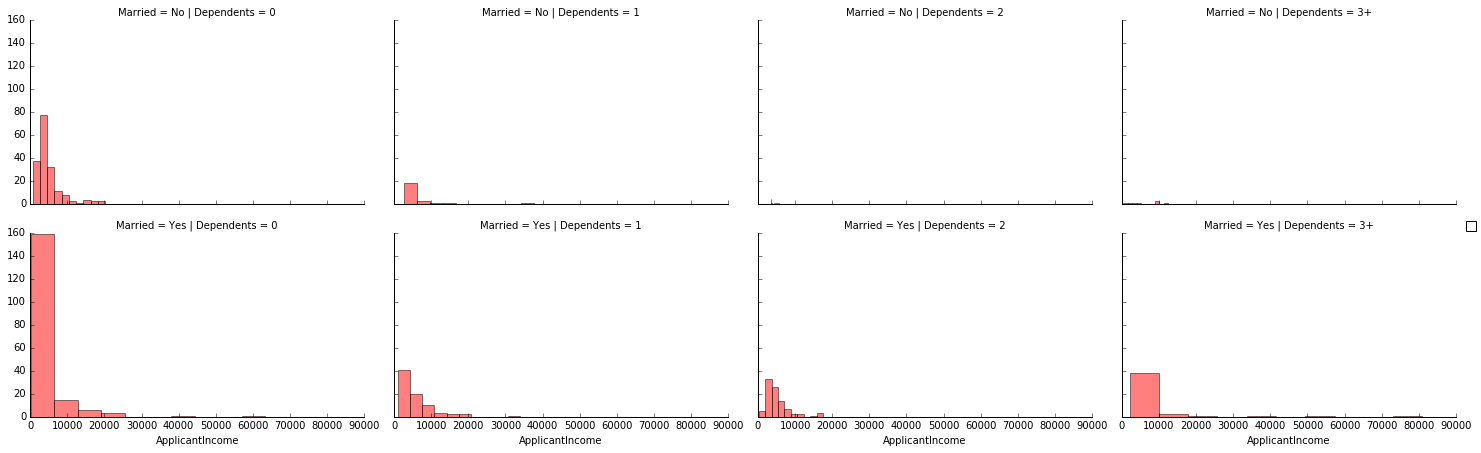

In [0]:
grid = sns.FacetGrid(df, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10,color='r',edgecolor='black')
grid.add_legend()

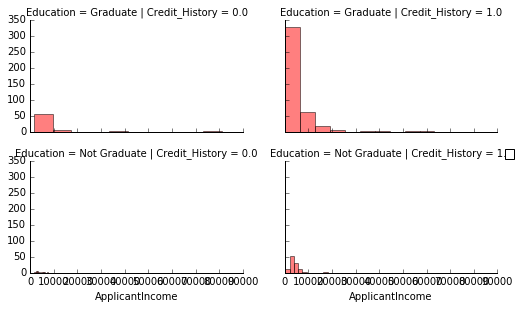

In [0]:
grid = sns.FacetGrid(df, row='Education', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10,color='r',edgecolor='black')
grid.add_legend()

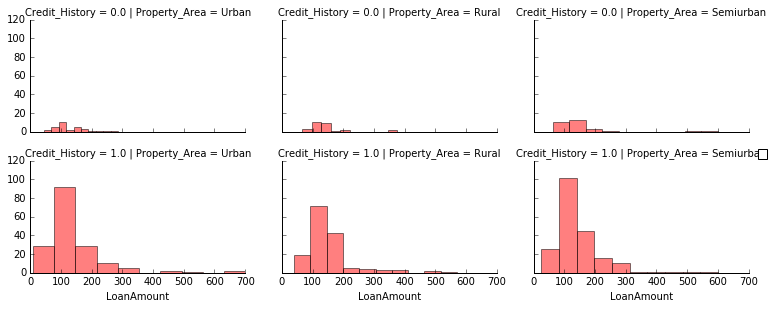

In [0]:
grid = sns.FacetGrid(df, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=10,color='r',edgecolor='black')
grid.add_legend()

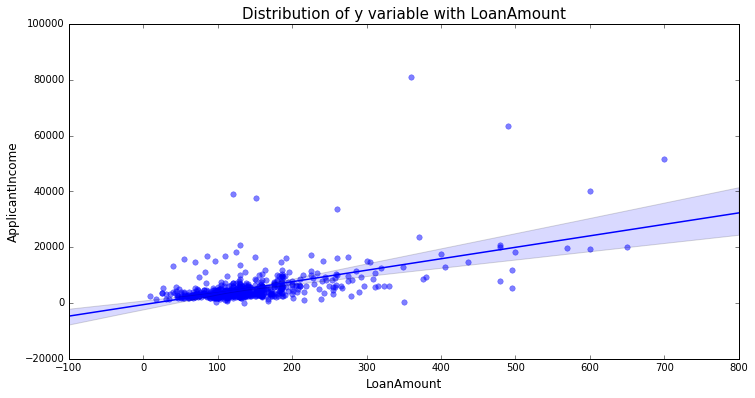

In [0]:
var_name = "LoanAmount"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

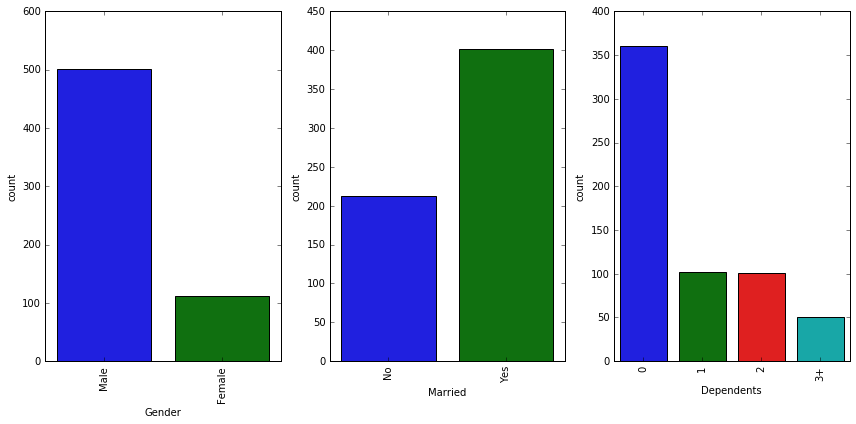

In [0]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df["Gender"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Married"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Dependents"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

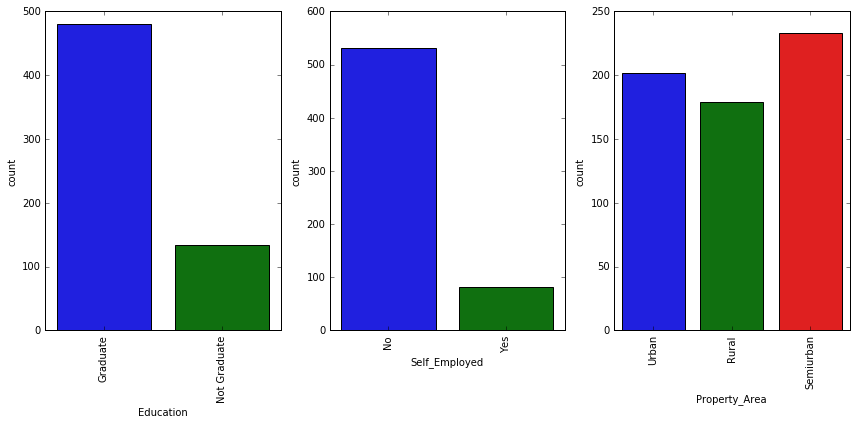

In [0]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df["Education"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Self_Employed"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Property_Area"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [0]:
#***************************************************************************************************************
#***************************                      Normalization                      ***************************
#***************************************************************************************************************

In [0]:
# checking for distribution of continuous variables and transform them on the same scale

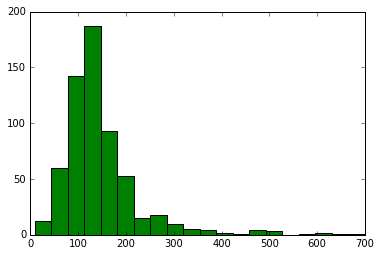

In [0]:
df['LoanAmount'].hist(bins=20,color="g",edgecolor='black',grid=False)

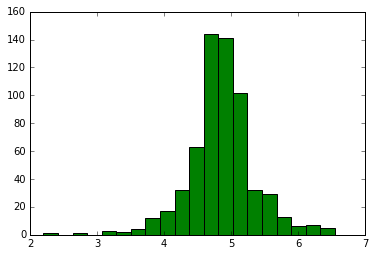

In [0]:
#log transformation
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20,color="g",edgecolor='black',grid=False)

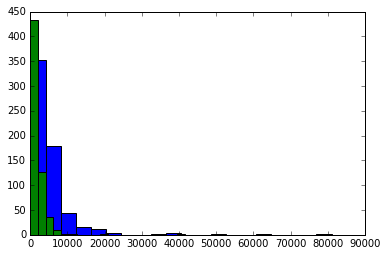

In [0]:
 # Combine applicant income and coapplicant income and then do log transformation 
df['ApplicantIncome'].hist(bins=20,fill=True,edgecolor='black',grid=False)
df['CoapplicantIncome'].hist(bins=20,fill=True,edgecolor='black',grid=False)

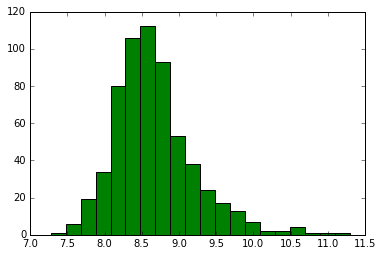

In [0]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20,color='g',edgecolor='black',grid=False) 

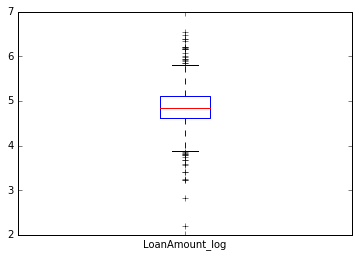

In [0]:
df.boxplot(column='LoanAmount_log',grid=False) #Outliers present

In [0]:
#***************************************************************************************************************
#***************************              Building predictive models                 ***************************
#***************************************************************************************************************

In [0]:
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [0]:
feats = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
df= pd.get_dummies(df,columns=feats,drop_first=True)

In [0]:
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,130.0,360.0,1.0,4.867534,5849.0,8.674026,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,4.852030,6091.0,8.714568,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,4.189655,3000.0,8.006368,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,4.787492,4941.0,8.505323,1,1,0,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.0,360.0,1.0,4.948760,6000.0,8.699515,1,0,0,0,0,0,0,0,1,1
5,LP001011,5417,4196.0,267.0,360.0,1.0,5.587249,9613.0,9.170872,1,1,0,1,0,0,1,0,1,1
6,LP001013,2333,1516.0,95.0,360.0,1.0,4.553877,3849.0,8.255569,1,1,0,0,0,1,0,0,1,1
7,LP001014,3036,2504.0,158.0,360.0,0.0,5.062595,5540.0,8.619750,1,1,0,0,1,0,0,1,0,0
8,LP001018,4006,1526.0,168.0,360.0,1.0,5.123964,5532.0,8.618305,1,1,0,1,0,0,0,0,1,1
9,LP001020,12841,10968.0,349.0,360.0,1.0,5.855072,23809.0,10.077819,1,1,1,0,0,0,0,1,0,0


In [0]:
df.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome',
       'TotalIncome_log', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Y'],
      dtype='object')

In [0]:
df.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome',
       'TotalIncome_log', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Y'],
      dtype='object')

In [0]:
df=df[['Loan_ID','Loan_Amount_Term', 'Credit_History', 'LoanAmount_log',
       'TotalIncome_log', 'Gender_Male', 'Married_Yes', 'Dependents_1','Dependents_2', 'Dependents_3+',
        'Education_Not Graduate','Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',  'Loan_Status_Y']]

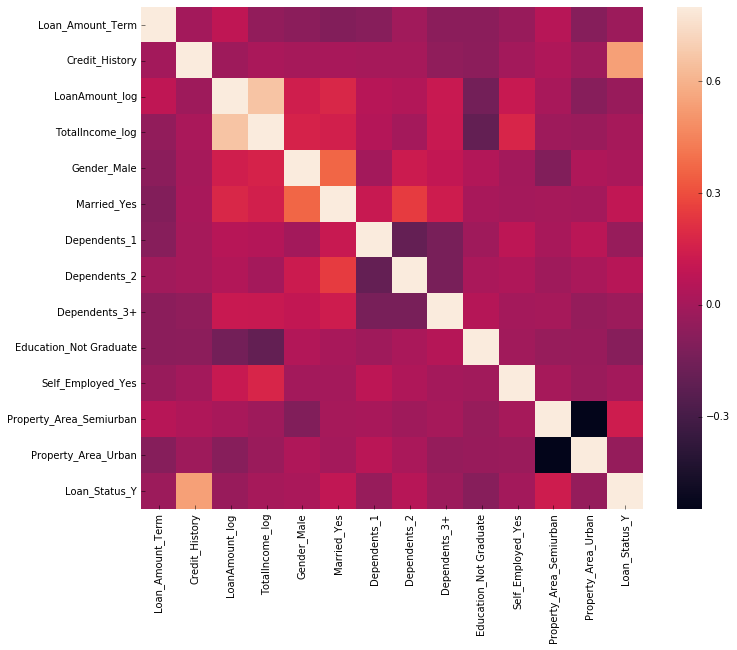

In [0]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,edgecolor='black');

In [0]:
y = df['Loan_Status_Y'].values
X = df.drop(['Loan_ID','Loan_Status_Y','LoanAmount_log'],axis=1).values

In [0]:
X

array([[360.        ,   1.        ,   8.67402599, ...,   0.        ,
          0.        ,   1.        ],
       [360.        ,   1.        ,   8.71456755, ...,   0.        ,
          0.        ,   0.        ],
       [360.        ,   1.        ,   8.00636757, ...,   1.        ,
          0.        ,   1.        ],
       ...,
       [360.        ,   1.        ,   9.02545553, ...,   0.        ,
          0.        ,   1.        ],
       [360.        ,   1.        ,   8.93366418, ...,   0.        ,
          0.        ,   1.        ],
       [360.        ,   0.        ,   8.43010908, ...,   1.        ,
          1.        ,   0.        ]])

In [0]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [0]:
#  predictive  models

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
X[0]

array([ 0.2732313 ,  0.41173269,  0.00846848,  0.47234264, -1.37208932,
       -0.44633928, -0.44371285, -0.30097532, -0.52836225, -0.39260074,
       -0.7820157 ,  1.42814704])

In [0]:
# Compare Algorithms

In [0]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [0]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=200, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.810417 (0.223907)
RF: 0.737500 (0.231503)
LDA: 0.810417 (0.223907)
KNN: 0.772917 (0.234955)
CART: 0.690000 (0.256331)
NB: 0.805417 (0.225813)
SVM: 0.805417 (0.223339)


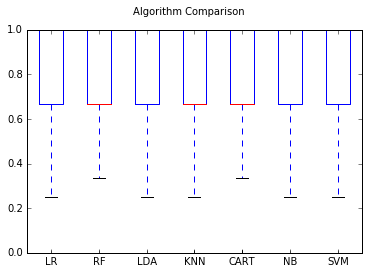

In [0]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
#                              predicting y for test data set

In [0]:
os.chdir(r"C:\Users\reza\Desktop\python project\loan_eligibility\Loan-prediction-using-Machine-Learning-and-Python-master\Loan-prediction-using-Machine-Learning-and-Python-master\data")
os.getcwd()

'C:\\Users\\reza\\Desktop\\python project\\loan_eligibility\\Loan-prediction-using-Machine-Learning-and-Python-master\\Loan-prediction-using-Machine-Learning-and-Python-master\\data'

In [0]:
df_test = pd.read_csv("test_loan_home.csv") 

In [0]:
#                                 check for missing value 

In [0]:
missing_values_table(df_test)      

Your selected dataframe has 12 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,29,7.9
Self_Employed,23,6.3
Gender,11,3.0
Dependents,10,2.7
Loan_Amount_Term,6,1.6
LoanAmount,5,1.4


In [0]:
#Exploratory data analysis for Categorical variables

In [0]:
df_test['Credit_History'].value_counts() # Mostly Male

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [0]:
df_test['Credit_History'].fillna(1,inplace=True) #impute missing value with 1(median)

In [0]:
df_test['Gender'].value_counts() # Mostly Male

Male      286
Female     70
Name: Gender, dtype: int64

In [0]:
df_test['Gender'].fillna('Male',inplace=True) #impute missing value with Male(median)

In [0]:
df_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [0]:
df_test['Dependents'].fillna('0',inplace=True) #impute missing value with 0 (median)

In [0]:
df_test['Married'].value_counts() 

Yes    233
No     134
Name: Married, dtype: int64

In [0]:
df_test['Married'].fillna('Yes',inplace=True) #impute missing value with Yes (median)

In [0]:
df_test['Education'].value_counts() # most of the people are graduates

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [0]:
df_test['Self_Employed'].value_counts() #Most of the people are not self employed, they are working

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [0]:
df_test['Self_Employed'].fillna('0',inplace=True) #impute missing value with No (median)

In [0]:
# Replace missing values
df_test['LoanAmount'] = df_test.groupby(['Education','Self_Employed'])['LoanAmount']\
                     .apply(lambda x: x.fillna(x.median()))

In [0]:
df_test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [0]:
df_test['Loan_Amount_Term'].fillna(360.0,inplace=True) #impute missing value with 360 (median)

In [0]:
#                                normalization  or log tranfer 

In [0]:
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

In [0]:
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

In [0]:
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])

In [0]:
#because we get the best result from logistic regresssion we use this model to predict our target

In [0]:
feats = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [0]:
df_test= pd.get_dummies(df_test,columns=feats,drop_first=True)

In [0]:
df_test=df_test[['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome',
       'TotalIncome_log', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']]

In [0]:
X_test = df_test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','TotalIncome','LoanAmount','LoanAmount_log'],axis=1).values
#y = df_final['Loan_Status_Y'].values

In [0]:
X_test

array([[360.        ,   1.        ,   8.65172408, ...,   0.        ,
          0.        ,   1.        ],
       [360.        ,   1.        ,   8.42858053, ...,   0.        ,
          0.        ,   1.        ],
       [360.        ,   1.        ,   8.82467789, ...,   0.        ,
          0.        ,   1.        ],
       ...,
       [360.        ,   1.        ,   8.56464913, ...,   0.        ,
          1.        ,   0.        ],
       [360.        ,   1.        ,   8.90828889, ...,   0.        ,
          0.        ,   0.        ],
       [180.        ,   1.        ,   9.12695876, ...,   1.        ,
          0.        ,   0.        ]])

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

In [0]:
X_test

array([[ 0.26602207,  0.4376739 ,  0.07253853, ..., -0.33484506,
        -0.67981718,  1.27335328],
       [ 0.26602207,  0.4376739 , -0.39717115, ..., -0.33484506,
        -0.67981718,  1.27335328],
       [ 0.26602207,  0.4376739 ,  0.43660049, ..., -0.33484506,
        -0.67981718,  1.27335328],
       ...,
       [ 0.26602207,  0.4376739 , -0.11075132, ..., -0.33484506,
         1.47098372, -0.78532801],
       [ 0.26602207,  0.4376739 ,  0.61259882, ..., -0.33484506,
        -0.67981718, -0.78532801],
       [-2.52163936,  0.4376739 ,  1.07289157, ...,  2.98645591,
        -0.67981718, -0.78532801]])

In [0]:
#Encoding dependent variable
# labelencoder_y=LabelEncoder()
# y=labelencoder_y.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test1)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test1, y_pred1))

y_test1.min()
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred1)

0.8292682926829268


In [0]:
X_test[0]

array([ 0.26602207,  0.4376739 ,  0.07253853,  0.48547939,  0.75835829,
       -0.43324619, -0.4376739 , -0.34974871, -0.5448117 , -0.33484506,
       -0.67981718,  1.27335328])

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [0]:
y_pred.tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,


In [0]:
#*****************************************************************************************************************
#************************************              THANK YOU             *****************************************
#*****************************************************************************************************************